![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Bike store sales

Let's put in practice the topics covered in the course and analyze sales made in a Bike Shop.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sales = pd.read_csv('data/sales_data.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First look at our data

Analyze what columns we have, what type they are and what data is on them.

In [3]:
sales.shape

(5000, 16)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
Date                5000 non-null object
Day                 5000 non-null int64
Month               5000 non-null object
Year                5000 non-null int64
Customer_Age        5000 non-null int64
Customer_Gender     5000 non-null object
Country             5000 non-null object
State               5000 non-null object
Product_Category    5000 non-null object
Sub_Category        5000 non-null object
Product             5000 non-null object
Order_Quantity      5000 non-null int64
Unit_Cost           5000 non-null int64
Unit_Price          5000 non-null int64
Profit              5000 non-null int64
Revenue             5000 non-null int64
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [6]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing column types

- Cast `Date` to `datetime`.
- Cast `Customer_Gender`, `Country`, `State`, `Product_Category` and `Sub_Category` to `category`.

In [7]:
from datetime import datetime
sales["Date"] = pd.to_datetime(sales["Date"])
sales[["Customer_Gender","Country","State","Product_Category","Sub_Category"]] = sales[["Customer_Gender","Country","State","Product_Category","Sub_Category"]].astype("category")

In [8]:
sales.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a summary of the main statistics of the whole data

In [9]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [10]:
sales["Customer_Age"].mean()

35.9338

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

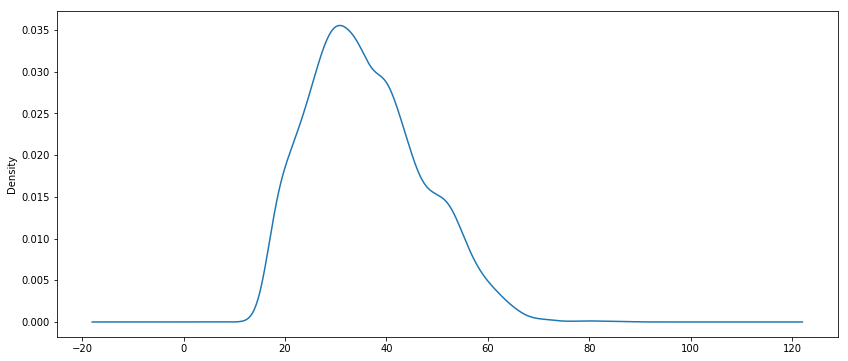

In [11]:
sales["Customer_Age"].plot(kind = "kde",figsize = (14,6))

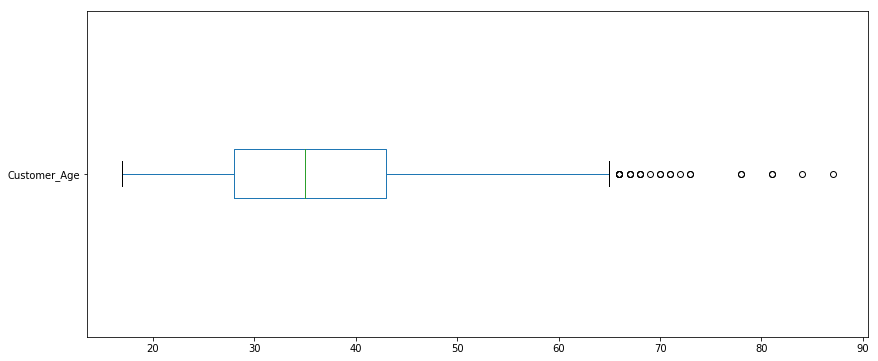

In [12]:
sales["Customer_Age"].plot(kind = "box",vert = False, figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [13]:
sales["Order_Quantity"].mean()


11.8204

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

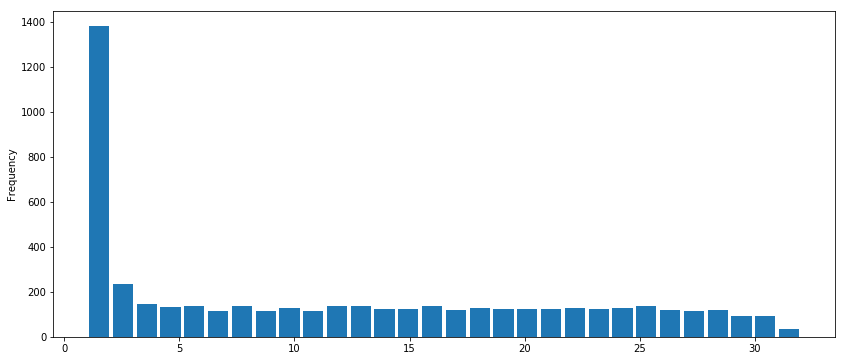

In [14]:
sales["Order_Quantity"].plot(kind = "hist",bins = 30,figsize = (14,6),rwidth = 0.85)

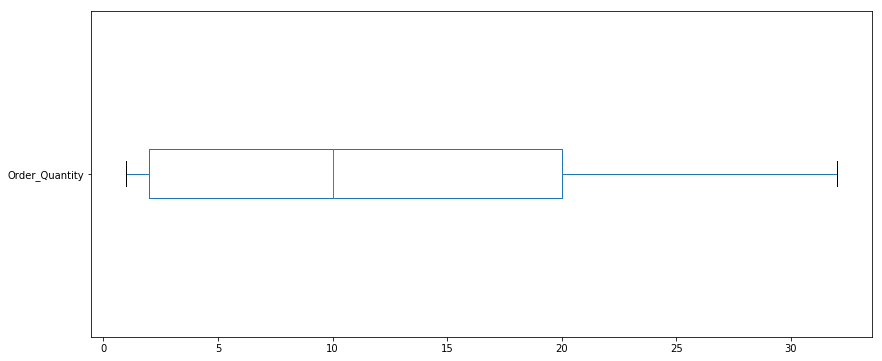

In [15]:
sales["Order_Quantity"].plot(kind = "box",vert = False,figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### In which countries were sales made?

In [16]:
sales['Country'].unique()

[United States, Canada, Australia, United Kingdom, Germany, France]
Categories (6, object): [United States, Canada, Australia, United Kingdom, Germany, France]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort sales by year

Older sales should be at the bottom.

In [17]:
sales.sort_values("Year",ascending = False,inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Reset the current index

Don't keep the old index.

In [18]:
sales.reset_index(drop = True,inplace = True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [19]:
sales["Year"].value_counts()

2014    1327
2016    1272
2015    1123
2013    1040
2011     126
2012     112
Name: Year, dtype: int64

Go ahead and show a <b>pie plot</b> and a <b>bar plot</b> with the previous data:

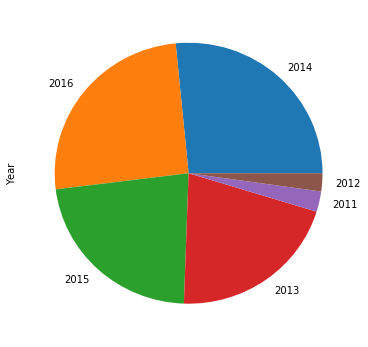

In [20]:
sales["Year"].value_counts().plot(kind = "pie",figsize = (6,6))

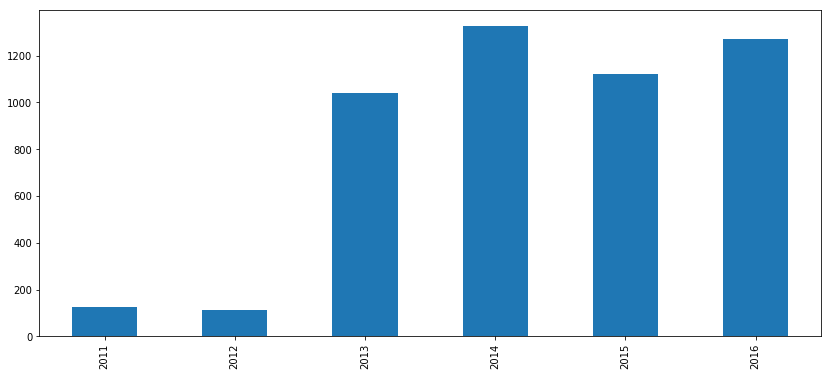

In [21]:
sales["Year"].value_counts().sort_index().plot(kind = "bar",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `Cost` column

This column should be:
$$ Cost = Unit\_Cost * Order\_Quantity $$

In [22]:
sales["Cost"] = sales["Unit_Cost"] * sales["Order_Quantity"]

sales["Cost"]

0        325
1         32
2        169
3          2
4        234
        ... 
4995     344
4996     688
4997    1266
4998    1266
4999    4665
Name: Cost, Length: 5000, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `YearMonth` column

This new `YearMonth` column should be the concatenation of `Year` and `Month` columns, separated by a '-'.

In [23]:
sales["YearMonth"] = sales["Year"].astype(str) + "-" + sales["Month"].astype(str)
sales["YearMonth"]


0           2016-July
1            2016-May
2          2016-March
3        2016-January
4           2016-June
            ...      
4995       2011-March
4996    2011-December
4997        2011-July
4998    2011-December
4999         2011-May
Name: YearMonth, Length: 5000, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Count how many sales we have per `YearMonth`.

In [24]:
sales["YearMonth"].value_counts()

2015-December    232
2016-April       218
2013-December    215
2014-June        215
2016-May         214
                ... 
2012-December      7
2012-February      6
2011-February      6
2011-June          6
2012-March         4
Name: YearMonth, Length: 62, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

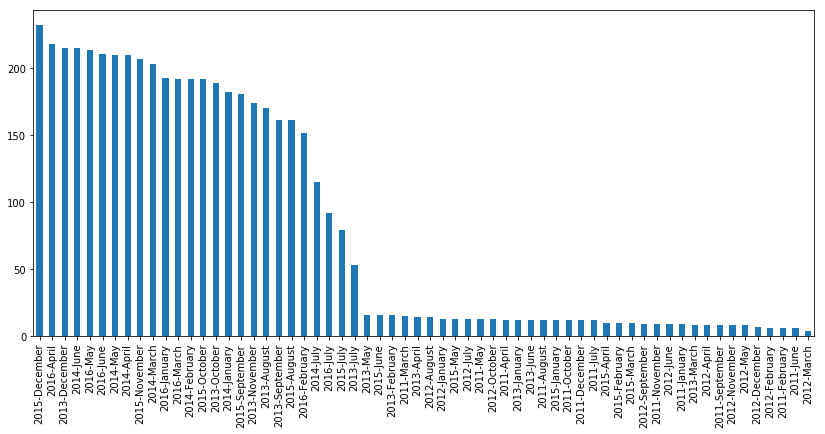

In [25]:
sales["YearMonth"].value_counts().plot(kind = "bar",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [26]:
sales["Country"].value_counts().head(1)

United States    1700
Name: Country, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

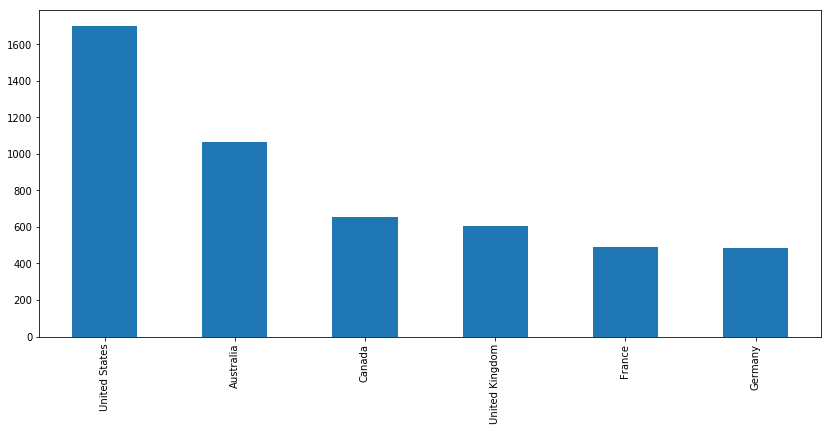

In [27]:
sales["Country"].value_counts().plot(kind = "bar",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a list of every product sold

In [28]:
sales.loc[:,"Product"].unique()

array(['Sport-100 Helmet, Red', 'Water Bottle - 30 oz.',
       'Sport-100 Helmet, Blue', 'Sport-100 Helmet, Black',
       'Patch Kit/8 Patches', 'Hitch Rack - 4-Bike', 'Road Tire Tube',
       'ML Mountain Tire', 'Mountain-400-W Silver, 42',
       'Touring Tire Tube', 'Fender Set - Mountain',
       'Touring-3000 Blue, 62', 'AWC Logo Cap',
       'Long-Sleeve Logo Jersey, L', 'Bike Wash - Dissolver',
       'Mountain-200 Silver, 46', 'Road-150 Red, 52', 'LL Mountain Tire',
       'Road-150 Red, 44', 'Road Bottle Cage', 'LL Road Tire',
       'Touring-1000 Yellow, 60', 'HL Road Tire', 'Mountain Tire Tube',
       'Touring-3000 Blue, 44', 'Short-Sleeve Classic Jersey, L',
       'Touring-1000 Blue, 50', 'HL Mountain Tire',
       'Half-Finger Gloves, L', 'Half-Finger Gloves, M',
       'Racing Socks, M', 'Road-650 Red, 52', 'ML Road Tire',
       'Mountain-400-W Silver, 40', 'Mountain-200 Silver, 42',
       'Long-Sleeve Logo Jersey, XL', 'Touring-1000 Yellow, 54',
       'Hydration P

Create a **bar plot** showing the 10 most sold products (best sellers):

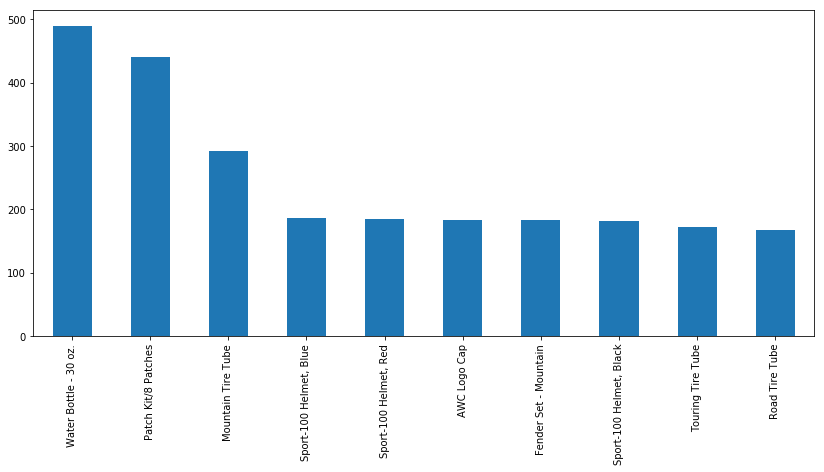

In [29]:
sales["Product"].value_counts().head(10).plot(kind = "bar",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

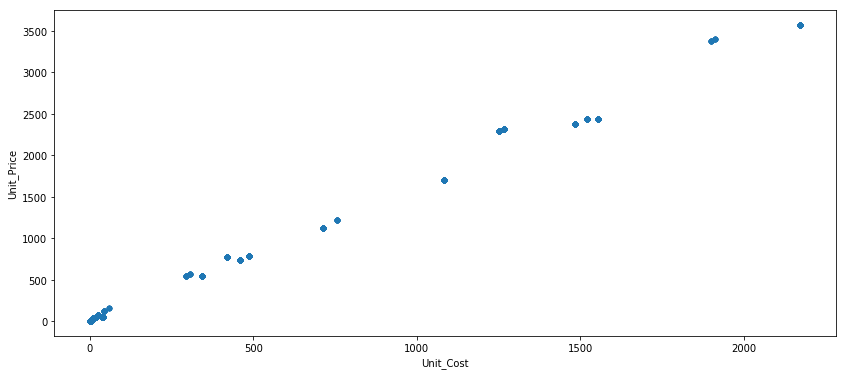

In [30]:
sales.plot(kind = "scatter",x="Unit_Cost",y="Unit_Price",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

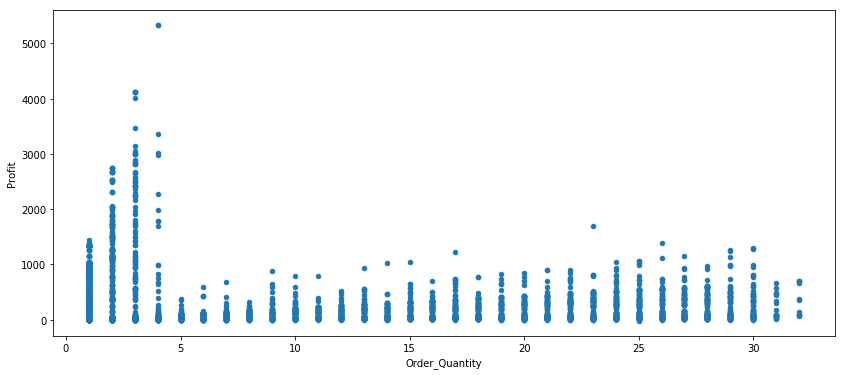

In [31]:
sales.plot(kind = "scatter",x="Order_Quantity",y="Profit",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

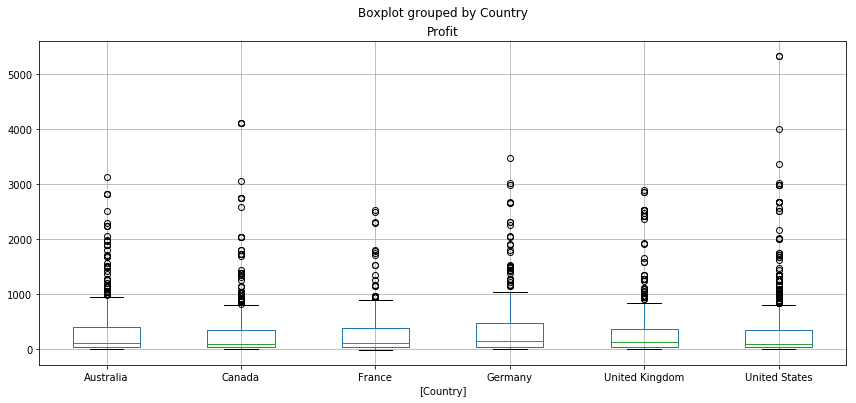

In [32]:
sales[["Profit","Country"]].boxplot(by = "Country",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

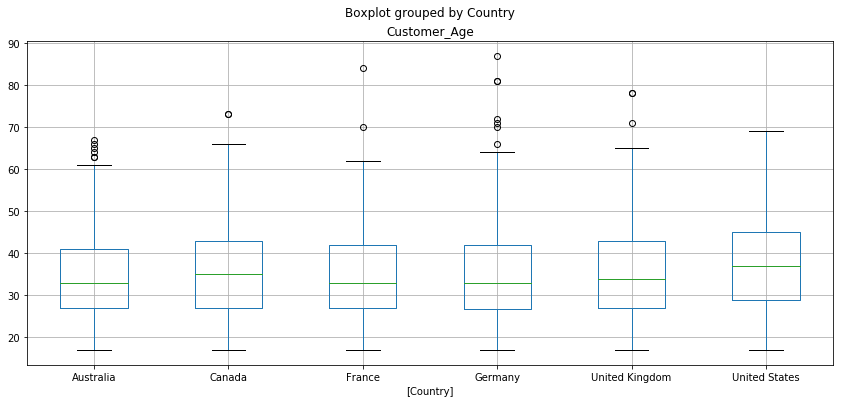

In [33]:
sales[["Customer_Age","Country"]].boxplot(by = "Country",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [34]:
sales.loc[:,"Revenue"] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [35]:
df = sales["Order_Quantity"].groupby(sales["Country"]).count()
df["Canada"] + df["France"]

1146

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [36]:
bike_racks_per_country = sales[sales["Sub_Category"] == "Bike Racks"].groupby(["Country"])["Country"].count()
bike_racks_per_country["Canada"]

3

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [37]:
sales_france_states = sales.loc[sales["Country"] == "France","State"].value_counts()
sales_france_states = sales_france_states[sales_france_states > 0]
sales_france_states

Seine (Paris)        101
Seine Saint Denis     87
Nord                  76
Yveline               48
Hauts de Seine        41
Essonne               40
Seine et Marne        16
Moselle               16
Loiret                13
Val d'Oise            11
Charente-Maritime     10
Garonne (Haute)       10
Pas de Calais          6
Val de Marne           5
Loir et Cher           5
Somme                  4
Name: State, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

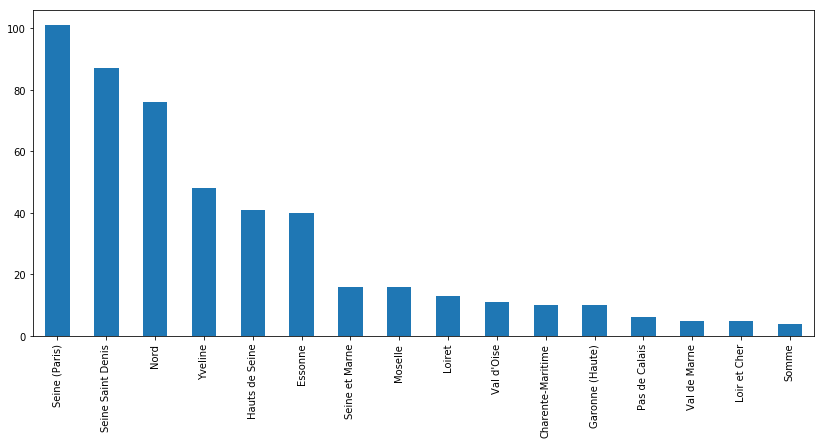

In [38]:
sales_france_states.plot(kind = "bar",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [39]:
sales.groupby(["Product_Category"])["Product_Category"].count()


Product_Category
Accessories    3090
Bikes          1166
Clothing        744
Name: Product_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

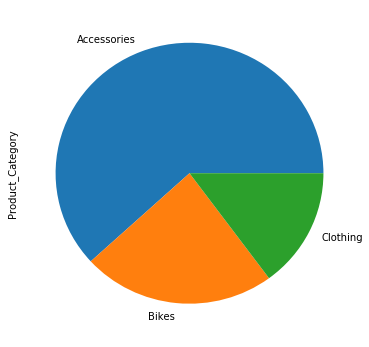

In [40]:
sales.groupby(["Product_Category"])["Product_Category"].count().plot(kind = "pie",figsize = (6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [41]:
accesories = sales.groupby(["Sub_Category"])["Sub_Category"].count().sort_values(ascending = False)

Go ahead and show a <b>bar plot</b> with the results:

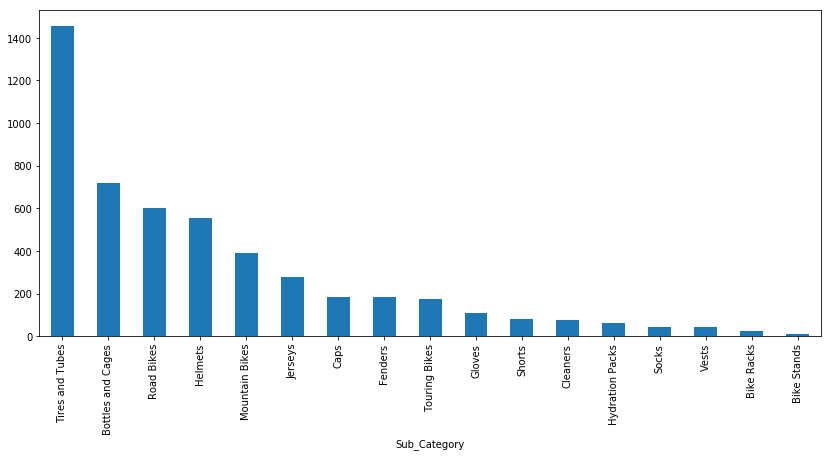

In [42]:
accesories.plot(kind = "bar",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [43]:
bike_categories = sales.loc[sales["Product_Category"] == "Bikes","Sub_Category"].value_counts()
bike_categories = bike_categories[bike_categories > 0]


Go ahead and show a <b>pie plot</b> with the results:

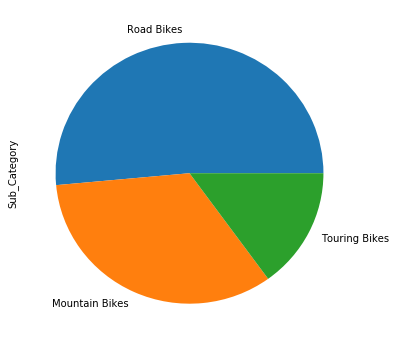

In [44]:
bike_categories.plot(kind = "pie",figsize = (6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [45]:
sales["Customer_Gender"].value_counts()

M    2564
F    2436
Name: Customer_Gender, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [46]:
sales_per_gender = sales.loc[sales["Revenue"] > 500,:].groupby(["Customer_Gender"])["Customer_Gender"].count()
sales_per_gender

Customer_Gender
F     961
M    1058
Name: Customer_Gender, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [47]:
sales.sort_values("Revenue",ascending = False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January
4986,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011-March
4959,2011-12-29,29,December,2011,25,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2011-December
1689,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2015-December
678,2016-01-28,28,January,2016,34,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2016-January


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [48]:
sales.sort_values("Revenue",ascending = False).head(1)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [49]:
sales.loc[sales["Revenue"] > 10000,:]["Order_Quantity"].mean()

3.25

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [50]:
sales.loc[sales["Revenue"] < 10000,:]["Order_Quantity"].mean()

11.834134615384615

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [51]:
sales[(sales["Date"] >= pd.Timestamp(year=2016, month=5, day=1)) & (sales["Date"] <= pd.Timestamp(year=2016, month=5, day=31))]["Date"].count()

214

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [52]:
sales[(sales["Date"] >= pd.Timestamp(year=2016, month=5, day=1)) & (sales["Date"] <= pd.Timestamp(year=2016, month=7, day=31))]["Date"].count()

517

Show a grouped <b>box plot</b> per month with the profit values.

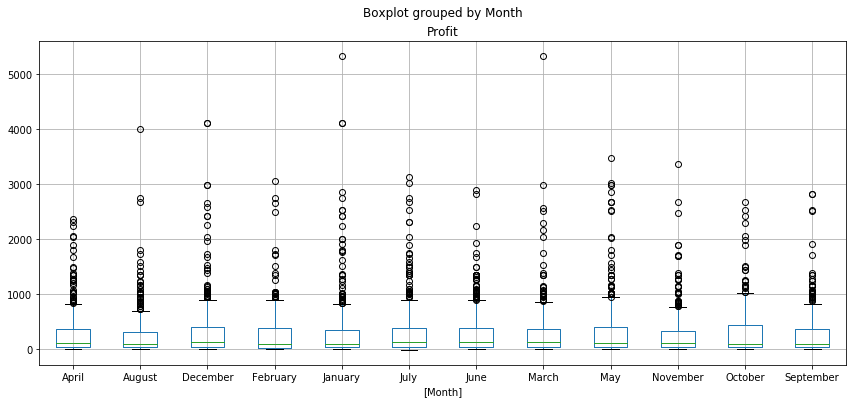

In [53]:
sales[["Month","Profit"]].boxplot(by = "Month",figsize = (14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [54]:
sales.loc[sales["Country"] == "United States","Unit_Price"] *= 1.072
sales["Unit_Price"]

0         37.52
1          5.36
2         35.00
3          5.00
4         35.00
         ...   
4995     540.00
4996     540.00
4997    2487.04
4998    2320.00
4999    2443.00
Name: Unit_Price, Length: 5000, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)